# libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# bands
a sample patch's 10 bands visualization for 1 data/acquisition

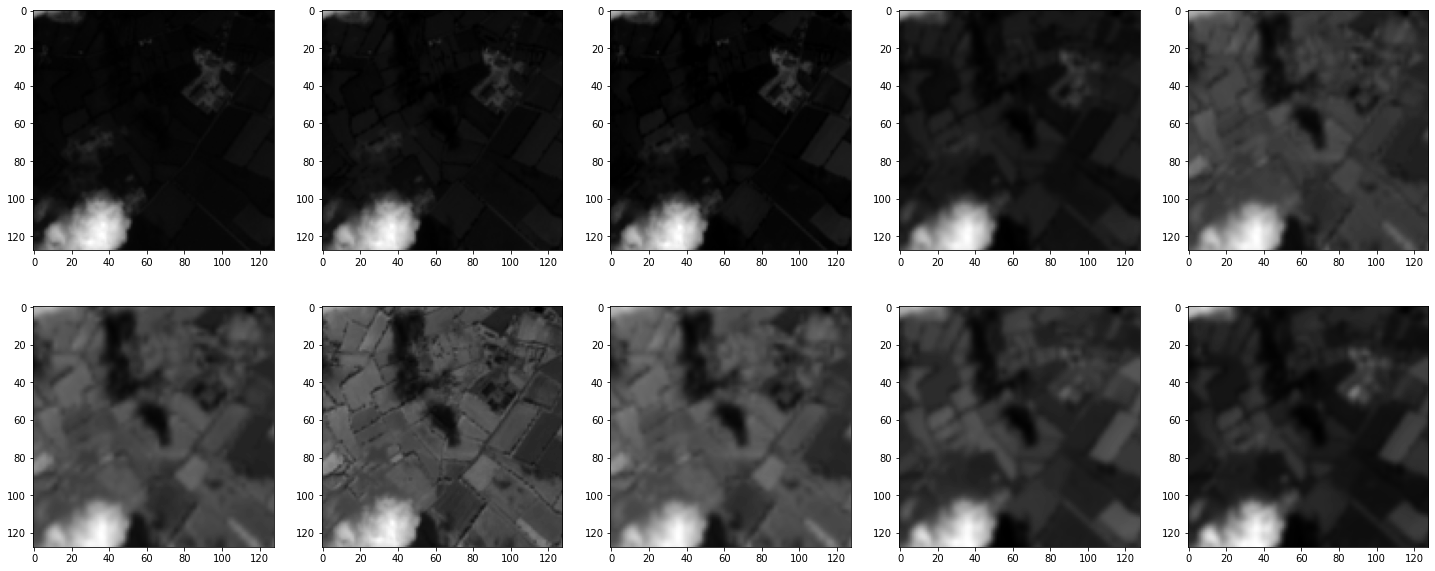

In [40]:
bands = 10
sample_frBands = np.load("D:\PASTIS\S2\DATA_S2\S2_10070.npy")
plt.figure(figsize=(25, 10))
for i in range(bands):
    plt.subplot(2, 5, i+1)
    plt.imshow(sample_frBands[0][i], cmap='gray')

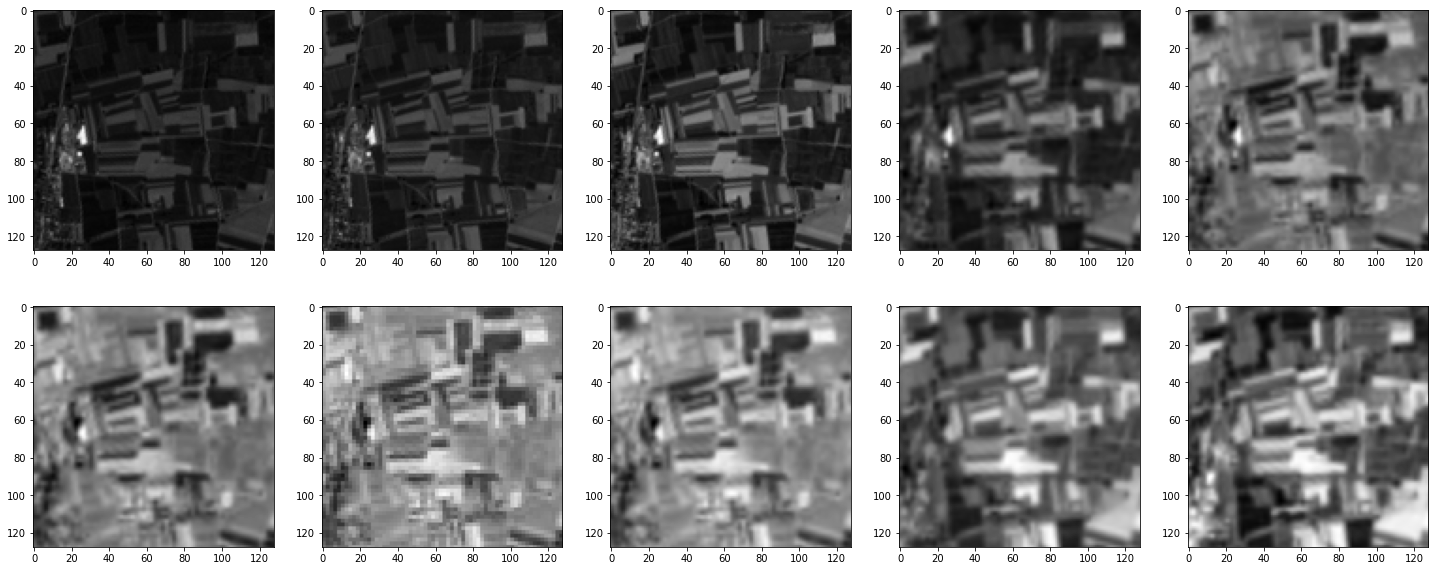

In [41]:
bands = 10
sample_frBands = np.load("D:\PASTIS\S2\DATA_S2\S2_40100.npy")
plt.figure(figsize=(25, 10))
for i in range(bands):
    plt.subplot(2, 5, i+1)
    plt.imshow(sample_frBands[0][i], cmap='gray')

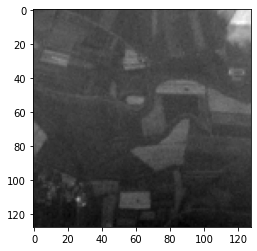

In [19]:
plt.imshow(a[0][0],cmap='gray')

# scaling & RGB

In [40]:
# scale pixel values to the range [0, 1]
def scale0to1(band):
    bandF = band.astype(np.float32)
    bandFSc = (bandF - np.min(bandF)) / (np.max(bandF) - np.min(bandF))
    return bandFSc

In [47]:
def RGBformat(band_path, acq):
    temp = np.load(band_path)
    rgb = np.stack([scale0to1(temp[acq][2]), scale0to1(temp[acq][1]), scale0to1(temp[acq][0])], axis=-1)
    return rgb

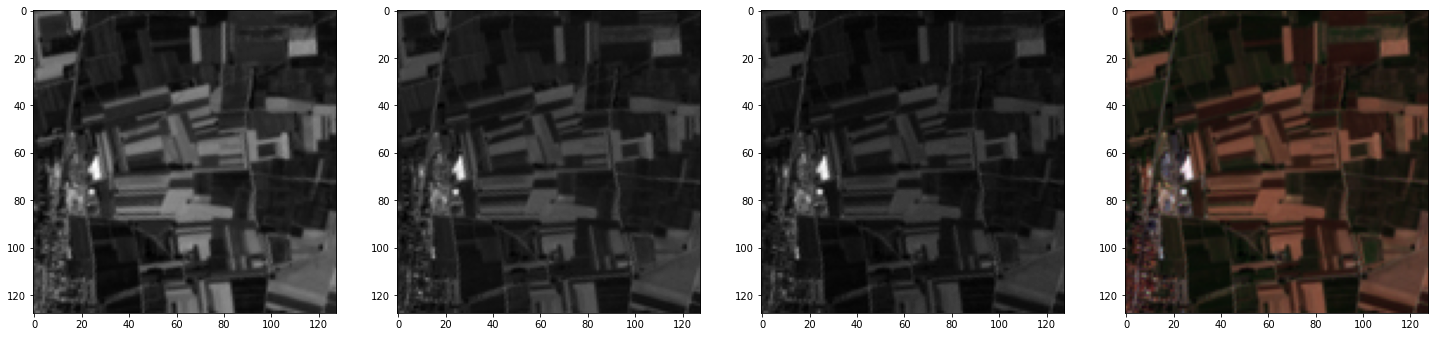

In [48]:
# sample visualization of R, G, B bands and RGB
rgb = RGBformat("D:\PASTIS\S2\DATA_S2\S2_40100.npy", 0)
temp = np.load("D:\PASTIS\S2\DATA_S2\S2_40100.npy")
tmp = [temp[0][2], temp[0][1], temp[0][0], rgb]

plt.figure(figsize=(25, 10))
for i in range(len(tmp)):
    plt.subplot(1, 4, i+1)
    if i < 3:
        plt.imshow(tmp[i], cmap='gray')
    else:
        plt.imshow(tmp[i])

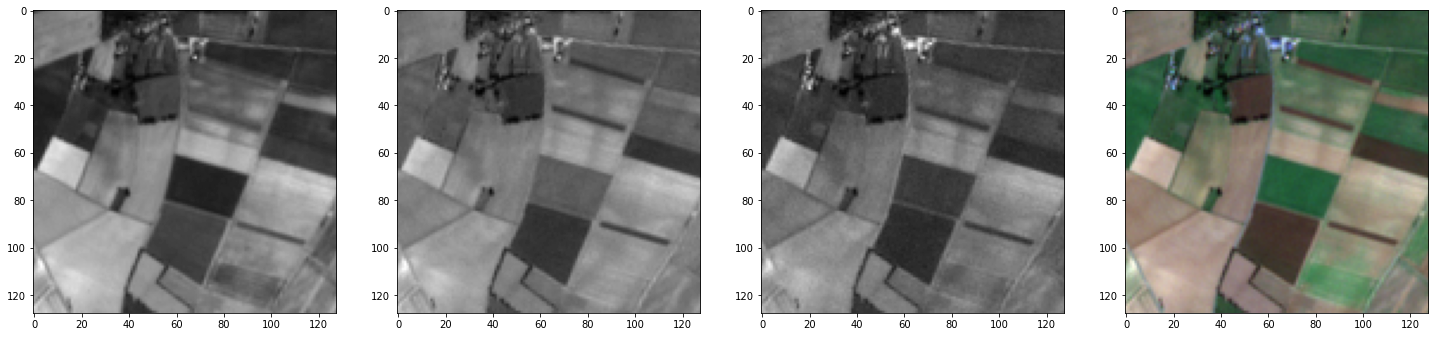

In [74]:
# sample visualization of R, G, B bands and RGB
temp = np.load("D:\PASTIS\S2\DATA_S2\S2_10059.npy")
rgb = np.stack([scale0to1(temp[1][2]), scale0to1(temp[1][1]), scale0to1(temp[1][0])], axis=-1)
tmp = [temp[1][2], temp[1][1], temp[1][0], rgb]

plt.figure(figsize=(25, 10))
for i in range(len(tmp)):
    plt.subplot(1, 4, i+1)
    if i < 3:
        plt.imshow(tmp[i], cmap='gray')
    else:
        plt.imshow(tmp[i])

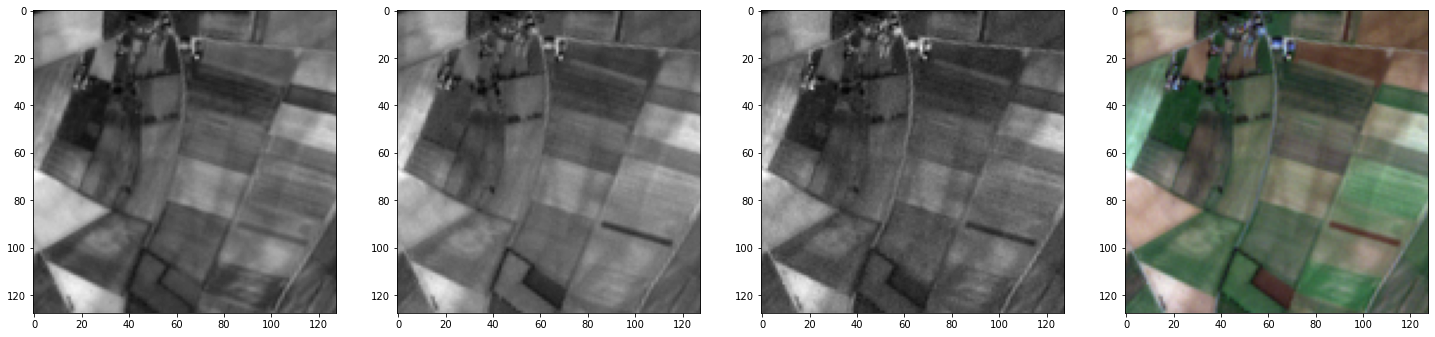

In [75]:
# sample visualization of R, G, B bands and RGB
temp = np.load("D:\PASTIS\S2\DATA_S2\S2_10059.npy")
rgb = np.stack([scale0to1(temp[15][2]), scale0to1(temp[15][1]), scale0to1(temp[15][0])], axis=-1)
tmp = [temp[15][2], temp[15][1], temp[15][0], rgb]

plt.figure(figsize=(25, 10))
for i in range(len(tmp)):
    plt.subplot(1, 4, i+1)
    if i < 3:
        plt.imshow(tmp[i], cmap='gray')
    else:
        plt.imshow(tmp[i])

# annotations

In [3]:
temp = np.load("D:\PASTIS\S2\ANNOTATIONS\ParcelIDs_10059.npy")

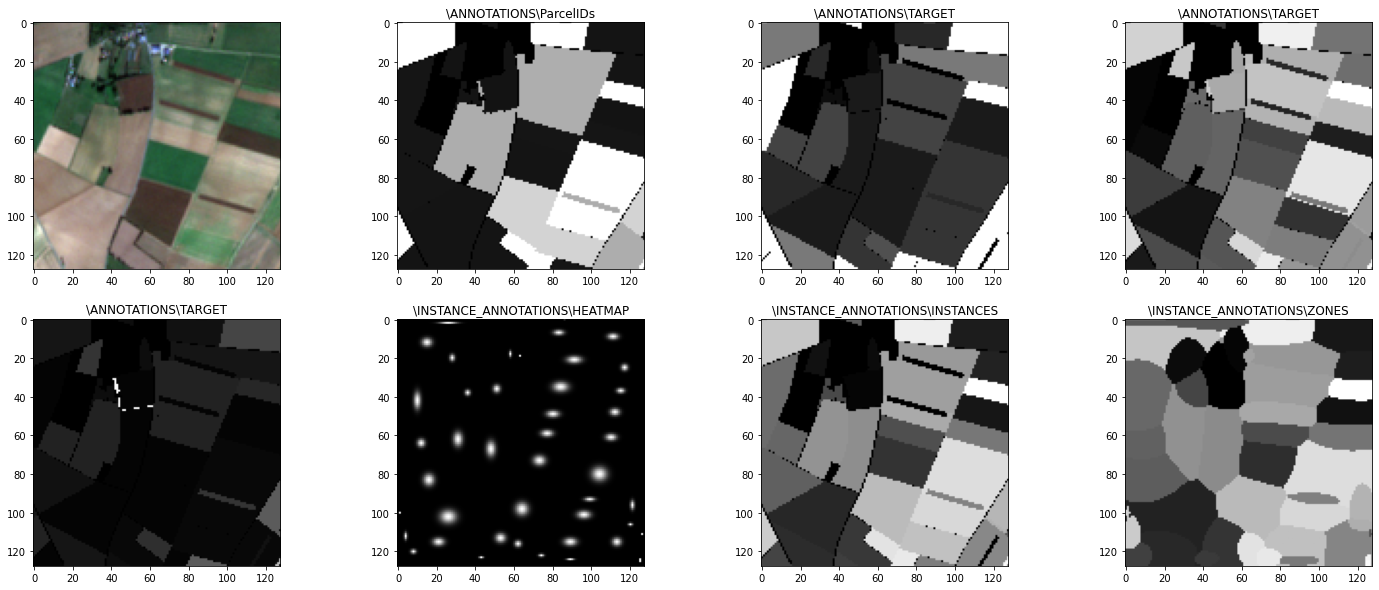

In [50]:
# sample visualization of annotations
paths = ["D:\PASTIS\S2\DATA_S2\S2_10059.npy", "D:\PASTIS\S2\ANNOTATIONS\ParcelIDs_10059.npy", "D:\PASTIS\S2\ANNOTATIONS\TARGET_10059.npy", "D:\PASTIS\S2\INSTANCE_ANNOTATIONS\HEATMAP_10059.npy", 
         "D:\PASTIS\S2\INSTANCE_ANNOTATIONS\INSTANCES_10059.npy", "D:\PASTIS\S2\INSTANCE_ANNOTATIONS\ZONES_10059.npy"]

counter = 0
offset = 0
plt.figure(figsize=(25, 10))
for i in range(8):
    plt.subplot(2, 4, i+1)
    if 2<=i<=4:
        j = 2
        plt.title((paths[j].split('S2')[1]).split('_')[0])
        plt.imshow(np.load(paths[j])[counter], cmap='gray')
        counter += 1
        offset = 2
    elif i == 0:
        plt.imshow(RGBformat(paths[i], 1))
    else:
        plt.title((paths[i-offset].split('S2')[1]).split('_1')[0])
        plt.imshow(np.load(paths[i-offset]), cmap='gray')

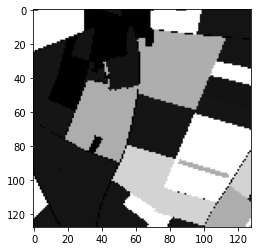

In [6]:
plt.imshow(temp, cmap='gray')

In [8]:
temp = np.load("D:\PASTIS\S2\INSTANCE_ANNOTATIONS\HEATMAP_10059.npy")

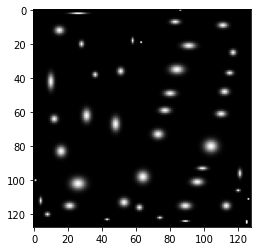

In [10]:
plt.imshow(temp, cmap='gray')

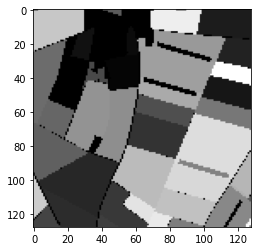

In [11]:
temp = np.load("D:\PASTIS\S2\INSTANCE_ANNOTATIONS\INSTANCES_10059.npy")
plt.imshow(temp, cmap='gray')

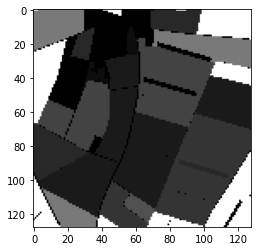

In [17]:
temp = np.load("D:\PASTIS\S2\ANNOTATIONS\TARGET_10059.npy")
plt.imshow(temp[0], cmap='gray')

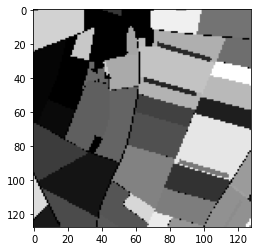

In [18]:
temp = np.load("D:\PASTIS\S2\ANNOTATIONS\TARGET_10059.npy")
plt.imshow(temp[1], cmap='gray')

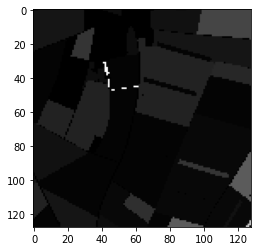

In [19]:
temp = np.load("D:\PASTIS\S2\ANNOTATIONS\TARGET_10059.npy")
plt.imshow(temp[2], cmap='gray')

# handle clouds - max convolution

# bin

In [53]:
temp[0][2]

array([[ 790,  881,  978, ...,  558,  541,  554],
       [1323, 1502, 1613, ...,  645,  727,  838],
       [1533, 1895, 1747, ...,  704,  853,  808],
       ...,
       [1813, 1513,  972, ...,  664,  656,  675],
       [1598, 1191, 1103, ...,  658,  648,  655],
       [1151, 1780, 1727, ...,  622,  627,  663]], dtype=int16)

In [54]:
np.min(temp[0][2])

163

In [58]:
b = temp[0][2].astype(np.float32)
b = (b-np.min(b))/(np.max(b) - np.min(b))
b

array([[0.16486984, 0.18879832, 0.21430449, ..., 0.10386537, 0.09939522,
        0.10281357],
       [0.30502236, 0.35209045, 0.38127795, ..., 0.12674205, 0.14830397,
        0.17749146],
       [0.36024192, 0.4554299 , 0.41651326, ..., 0.14225611, 0.1814357 ,
        0.16960295],
       ...,
       [0.433868  , 0.3549829 , 0.2127268 , ..., 0.1317381 , 0.1296345 ,
        0.13463056],
       [0.37733367, 0.2703129 , 0.24717328, ..., 0.1301604 , 0.1275309 ,
        0.12937155],
       [0.2597949 , 0.42519063, 0.4112543 , ..., 0.12069419, 0.12200894,
        0.13147515]], dtype=float32)

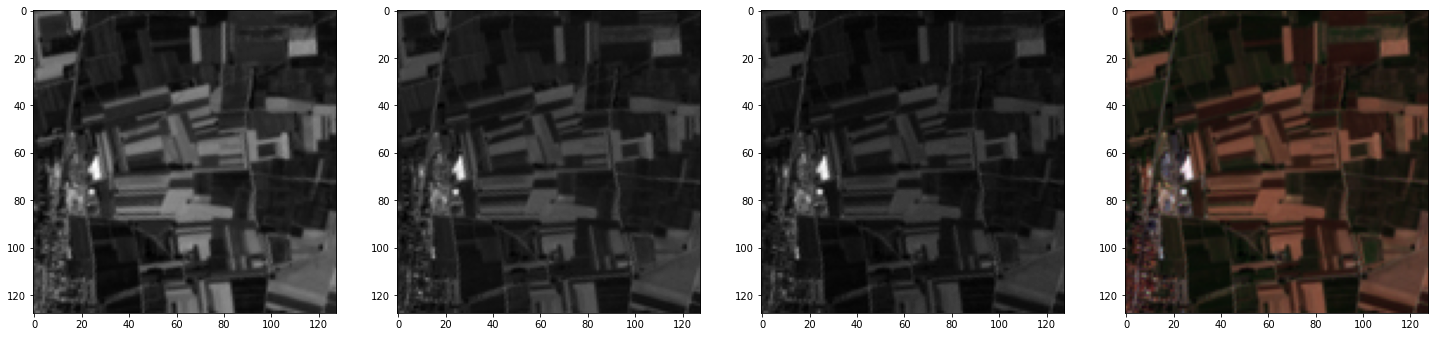

In [70]:
temp = np.load("D:\PASTIS\S2\DATA_S2\S2_40100.npy")
rgb = np.stack([scale0to1(temp[0][2]), scale0to1(temp[0][1]), scale0to1(temp[0][0])], axis=-1)
tmp = [temp[0][2], temp[0][1], temp[0][0], rgb]
plt.figure(figsize=(25, 10))
for i in range(len(tmp)):
    plt.subplot(1, 4, i+1)
    if i < 3:
        plt.imshow(tmp[i], cmap='gray')
    else:
        plt.imshow(tmp[i])

In [68]:
tmp = [temp[0][2], temp[0][1], rgb]
len(tmp)

38

In [56]:
rgb = np.stack([temp[0][2], temp[0][1], temp[0][0]], axis=-1)
rgb

array([[[ 790,  544,  331],
        [ 881,  588,  361],
        [ 978,  620,  424],
        ...,
        [ 558,  548,  311],
        [ 541,  523,  314],
        [ 554,  514,  289]],

       [[1323,  887,  641],
        [1502,  989,  651],
        [1613, 1045,  679],
        ...,
        [ 645,  571,  368],
        [ 727,  602,  419],
        [ 838,  702,  463]],

       [[1533, 1122,  787],
        [1895, 1258,  860],
        [1747, 1175,  783],
        ...,
        [ 704,  607,  381],
        [ 853,  700,  477],
        [ 808,  700,  446]],

       ...,

       [[1813, 1292,  841],
        [1513,  953,  599],
        [ 972,  694,  636],
        ...,
        [ 664,  422,  316],
        [ 656,  441,  301],
        [ 675,  489,  357]],

       [[1598,  963,  759],
        [1191,  747,  544],
        [1103,  855,  633],
        ...,
        [ 658,  461,  309],
        [ 648,  458,  298],
        [ 655,  452,  307]],

       [[1151,  747,  520],
        [1780, 1237, 1075],
        [1727, 1

In [ ]:
plt.imshow(temp[0][6],cmap='gray')

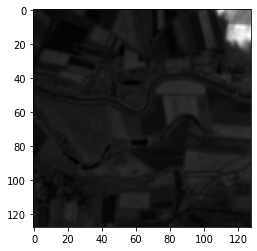

In [30]:
plt.imshow(a[0][6],cmap='gray')

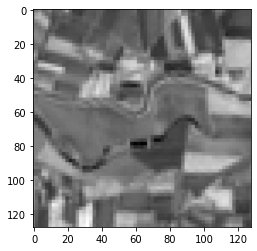

In [36]:
plt.imshow(a[20][6],cmap='gray')

In [15]:
np.load("D:\PASTIS\S2\DATA_S2\S2_10100.npy").shape

(43, 10, 128, 128)